/tmp/ipykernel_804286/4129266735.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df_unique['model_combined'] = combined_df_unique['model_combined'].map(short_name_mapping)


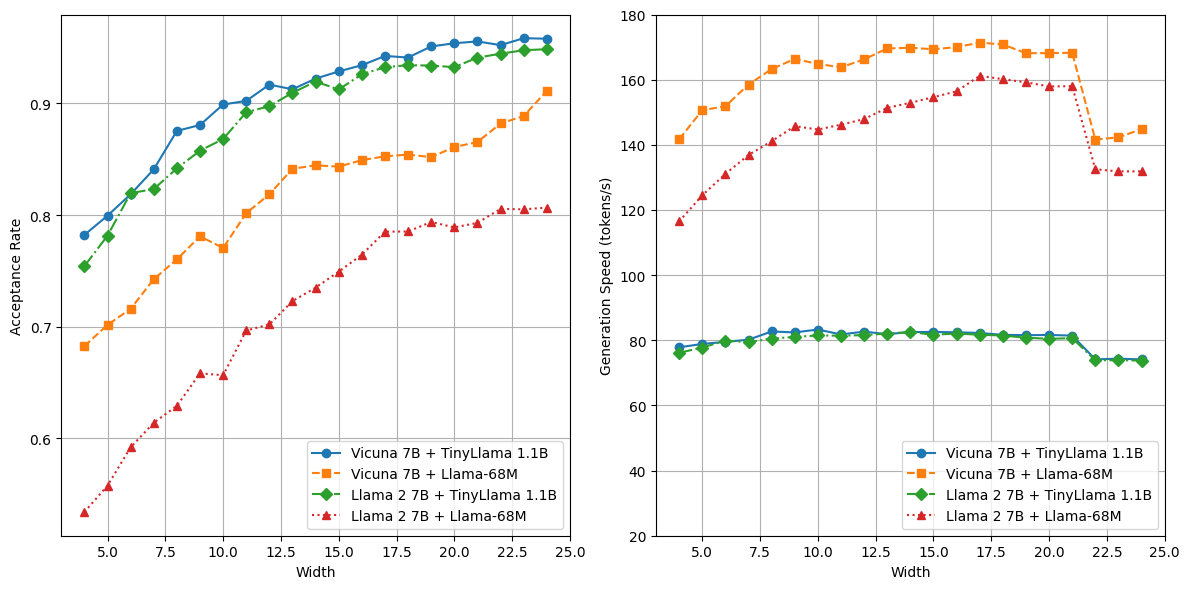

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the provided CSV files
file_with_decision_model = '/home/yixiaozeng/DynaSD/results/dynasd_acc_rate_speed_vs_width.csv'
file_without_decision_model = '/home/yixiaozeng/DynaSD/results/dynasd_acc_rate_speed_vs_width_no_decision_model.csv'

# Read the CSV files into pandas DataFrames
df_with_decision_model = pd.read_csv(file_with_decision_model)
df_without_decision_model = pd.read_csv(file_without_decision_model)

# Extract relevant columns from the first file (with decision model)
df_with_decision_model['model'] = df_with_decision_model.iloc[:, 0]
df_with_decision_model['companion_model'] = df_with_decision_model.iloc[:, 1]
df_with_decision_model['width'] = df_with_decision_model.iloc[:, 2].apply(lambda x: eval(x))
df_with_decision_model['acceptance_rate'] = df_with_decision_model.iloc[:, 3].apply(lambda x: eval(x))
df_with_decision_model['speed'] = df_with_decision_model.iloc[:, 4].apply(lambda x: eval(x))

# Same extraction for the second file (without decision model)
df_without_decision_model['model'] = df_without_decision_model.iloc[:, 0]
df_without_decision_model['companion_model'] = df_without_decision_model.iloc[:, 1]
df_without_decision_model['width'] = df_without_decision_model.iloc[:, 2].apply(lambda x: eval(x))
df_without_decision_model['acceptance_rate'] = df_without_decision_model.iloc[:, 3].apply(lambda x: eval(x))
df_without_decision_model['speed'] = df_without_decision_model.iloc[:, 4].apply(lambda x: eval(x))

# Combine the model and companion_model columns for easier labeling
df_with_decision_model['model_combined'] = df_with_decision_model['model'] + " + " + df_with_decision_model['companion_model']
df_without_decision_model['model_combined'] = df_without_decision_model['model'] + " + " + df_without_decision_model['companion_model']

# Merge both dataframes (since they represent different models)
combined_df = pd.concat([df_with_decision_model, df_without_decision_model])

# Drop duplicates based on combined model column
combined_df_unique = combined_df.drop_duplicates(subset=['model_combined'])

# Define a mapping for shorter names
short_name_mapping = {
    'lmsys/vicuna-7b-v1.5 + TinyLlama/TinyLlama-1.1B-Chat-v1.0': 'Vicuna 7B + TinyLlama 1.1B',
    'lmsys/vicuna-7b-v1.5 + JackFram/llama-68m': 'Vicuna 7B + Llama-68M',
    'meta-llama/Llama-2-7b-chat-hf + TinyLlama/TinyLlama-1.1B-Chat-v1.0': 'Llama 2 7B + TinyLlama 1.1B',
    'meta-llama/Llama-2-7b-chat-hf + JackFram/llama-68m': 'Llama 2 7B + Llama-68M'
}

# Apply the shorter names
combined_df_unique['model_combined'] = combined_df_unique['model_combined'].map(short_name_mapping)

# Assign different line styles for each model
line_styles = ['solid', 'dashed', 'dashdot', 'dotted']
marker_styles = ['o', 's', 'D', '^']

# Plotting function for customized graph with adjusted y-axis for generation speed
def plot_customized_graph_with_new_yrange(df):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    for i, (index, row) in enumerate(df.drop_duplicates(subset=['model_combined']).iterrows()):
        widths = row['width']
        acceptance_rates = row['acceptance_rate']
        speeds = row['speed']

        # Plot the Acceptance Rate with different line styles
        axs[0].plot(widths, acceptance_rates, marker=marker_styles[i], linestyle=line_styles[i], label=row['model_combined'])
        
        # Plot the Speed with different line styles
        axs[1].plot(widths, speeds, marker=marker_styles[i], linestyle=line_styles[i], label=row['model_combined'])

    # Labels and Legends for the Acceptance Rate graph
    axs[0].set_xlabel("Width")
    axs[0].set_ylabel("Acceptance Rate")
    axs[0].grid()
    axs[0].legend()

    # Adjust the y-axis range for Generation Speed graph
    axs[1].set_ylim(20, 180)  # Adjusting the range from 20 to 180
    axs[1].set_xlabel("Width")
    axs[1].set_ylabel("Generation Speed (tokens/s)")
    axs[1].grid()
    axs[1].legend(loc='lower right')

    plt.tight_layout()
    plt.savefig('dynasd_acc_rate_speed_vs_width.pdf')
    plt.show()
    

# Call the plotting function with adjusted y-range for the speed graph (20 to 180)
plot_customized_graph_with_new_yrange(combined_df_unique)
